<h2>Analysis Introduction</h2><br>
Within the field of mother and child health, birthweight is a crucial indicator of newborn health and well-being. As a public health consultant, my responsibility goes beyond simple analysis into the predictive domains of machine learning and computational analytics. The complex relationships between birthweight and a variety of acquired and preventative factors are more than just statistical puzzles; they are the strands in the fabric of life, each holding the key to preventing the negative consequences that can arise from low birthweight.I feel a great deal of responsibility as I set out on this analytical journey because I know that the results of my work could be the difference between life and death, not just numbers and graphs. This analysis is a lifeline and a proactive attack on the silent tragedy of low birthweight in newborns around the world. 

In [1]:
# installing phik (phi coefficient)
%pip install phik    

Note: you may need to restart the kernel to use updated packages.


In [2]:
########################################
# importing packages
########################################

# essentials
import matplotlib.pyplot as plt # data visualization
import pandas            as pd  # data science essentials
import numpy             as np  # mathematical essentials
import seaborn as sns                 # enhanced graphical output

# model preparation
from sklearn.preprocessing import StandardScaler       # standard scaler
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.model_selection import RandomizedSearchCV # hp tuning


# model results
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix


# machine learning
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.linear_model import RidgeClassifier
import statsmodels.formula.api as smf # logistic regression
import sklearn.linear_model           # logistic regression


# preprocessing and testing
from sklearn.preprocessing import power_transform    # yeo-johnson
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import (confusion_matrix,
                             roc_auc_score, precision_score, recall_score)

import phik 

# supress warnings (be careful while using this)
import warnings
warnings.filterwarnings('ignore')

########################################
# import data and setting display options
########################################
## importing data ##

# reading modeling data into Python
modeling_data = '/Users/vivi/Desktop/Introduction to Machine Learning & AI/birthweight.xlsx'

# calling this df_train
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 'data',
                         header     = 0,
                         index_col  = 'bwt_id')

# reading testing data into Python
testing_data = '/Users/vivi/Desktop/Introduction to Machine Learning & AI/test.xlsx'

# calling this df_test
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 'data',
                        header     = 0,
                        index_col  = 'bwt_id')


In [3]:
# concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'


# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)

df_full_sorted = df_full.sort_index()

# checking data
df_full.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,set
bwt_id,,,,,,,,,,,,,,,,,,,
bwt_1,28,12.0,2,10.0,31.0,17.0,8.0,9.0,0.0,0.0,0,1,0,0,1,0,0,3317.0,Not Kaggle
bwt_2,21,NaN,1,6.0,21.0,NaN,8.0,9.0,NaN,NaN,0,1,0,0,1,0,0,1160.0,Not Kaggle
bwt_3,27,15.0,2,11.0,32.0,16.0,9.0,9.0,0.0,0.0,1,1,0,0,1,0,0,4706.0,Not Kaggle
bwt_4,33,17.0,1,20.0,39.0,17.0,9.0,10.0,0.0,0.0,0,0,0,1,0,0,1,3289.0,Not Kaggle
bwt_5,30,15.0,2,12.0,36.0,16.0,9.0,9.0,NaN,NaN,1,1,0,0,1,0,0,3490.0,Not Kaggle


In [4]:
# descriptive statistics
df_full.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,473.000000,467.000000,473.000000,452.000000,472.000000,463.000000,471.000000,471.000000,440.000000,441.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,409.000000
mean,29.784355,13.680942,2.205074,11.535398,32.169492,13.866091,8.225053,8.951168,1.172727,0.020408,0.505285,0.871036,0.073996,0.054968,0.877378,0.073996,0.048626,3189.870416
std,5.105664,2.136672,1.330149,3.924575,6.097656,2.222327,1.368447,0.575893,4.211621,0.297017,0.500501,0.335515,0.262041,0.228160,0.328350,0.262041,0.215312,748.450059
min,16.000000,3.000000,0.000000,0.000000,18.000000,6.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000
25%,26.000000,12.000000,1.000000,10.000000,28.000000,12.000000,8.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2780.000000
50%,30.000000,13.000000,2.000000,12.000000,32.000000,14.000000,9.000000,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3340.000000
75%,33.000000,16.000000,3.000000,13.000000,36.000000,16.000000,9.000000,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3686.000000
max,44.000000,17.000000,8.000000,36.000000,62.000000,17.000000,10.000000,10.000000,30.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5089.000000


These descriptive data offer an overview of the different factors that could affect a population's birth weight. Mothers have completed some education beyond high school on average, as seen by the mean maternal age (mage) of approximately 29.78 years and the mean maternal education (meduc) of roughly 13.68 years. With a mean of 2.2 and an average of 11.54 prenatal visits (npvis), prenatal care typically begins around the second month of pregnancy (monpre). These figures indicate a comparatively high degree of prenatal care involvement. Fathers appear to be slightly older than mothers, based on the mean paternal age (fage), which is approximately 32 years. Newborns are considered healthy when their average Apgar scores (omaps for one minute and fmaps for five minutes) are above 8. Pregnancy-related rates of drinking and smoking are low, which is good for the health of the unborn child. The average birth weight (BWHT) is approximately 3189.87 grams, falling within a healthy range; however, this figure may vary depending on the previously listed circumstances.

In [5]:
# Missing value 
# checking each feature for missing values
missing_counts = df_full.isnull().sum(axis=0)
missing_percentages = df_full.isnull().mean(axis=0)
missing_info = pd.DataFrame({'Missing Count': missing_counts, 
                             'Missing Percentage': missing_percentages})
print(missing_info)

        Missing Count  Missing Percentage
mage                0            0.000000
meduc               6            0.012685
monpre              0            0.000000
npvis              21            0.044397
fage                1            0.002114
feduc              10            0.021142
omaps               2            0.004228
fmaps               2            0.004228
cigs               33            0.069767
drink              32            0.067653
male                0            0.000000
mwhte               0            0.000000
mblck               0            0.000000
moth                0            0.000000
fwhte               0            0.000000
fblck               0            0.000000
foth                0            0.000000
bwght              64            0.135307
set                 0            0.000000


The missing data in a dataset that was used to analyze birth weight is summarized in this table. The completeness of data collection is demonstrated by the absence of missing values for several variables, including the sex of the infant (male), the month prenatal care began (monpre), and the mother's age (mage). Nonetheless, there are clear deficiencies in the number of prenatal visits (npvis) at 4.44%, maternal education (meduc) at approximately 12.69%, and birth weight (bwght) at 13.53%. In roughly 6.97% of instances, information on alcohol use (drink) and cigarette use (cigs) during pregnancy is absent. These missing values may have an effect on how birth weight-related parameters are analyzed and interpreted.

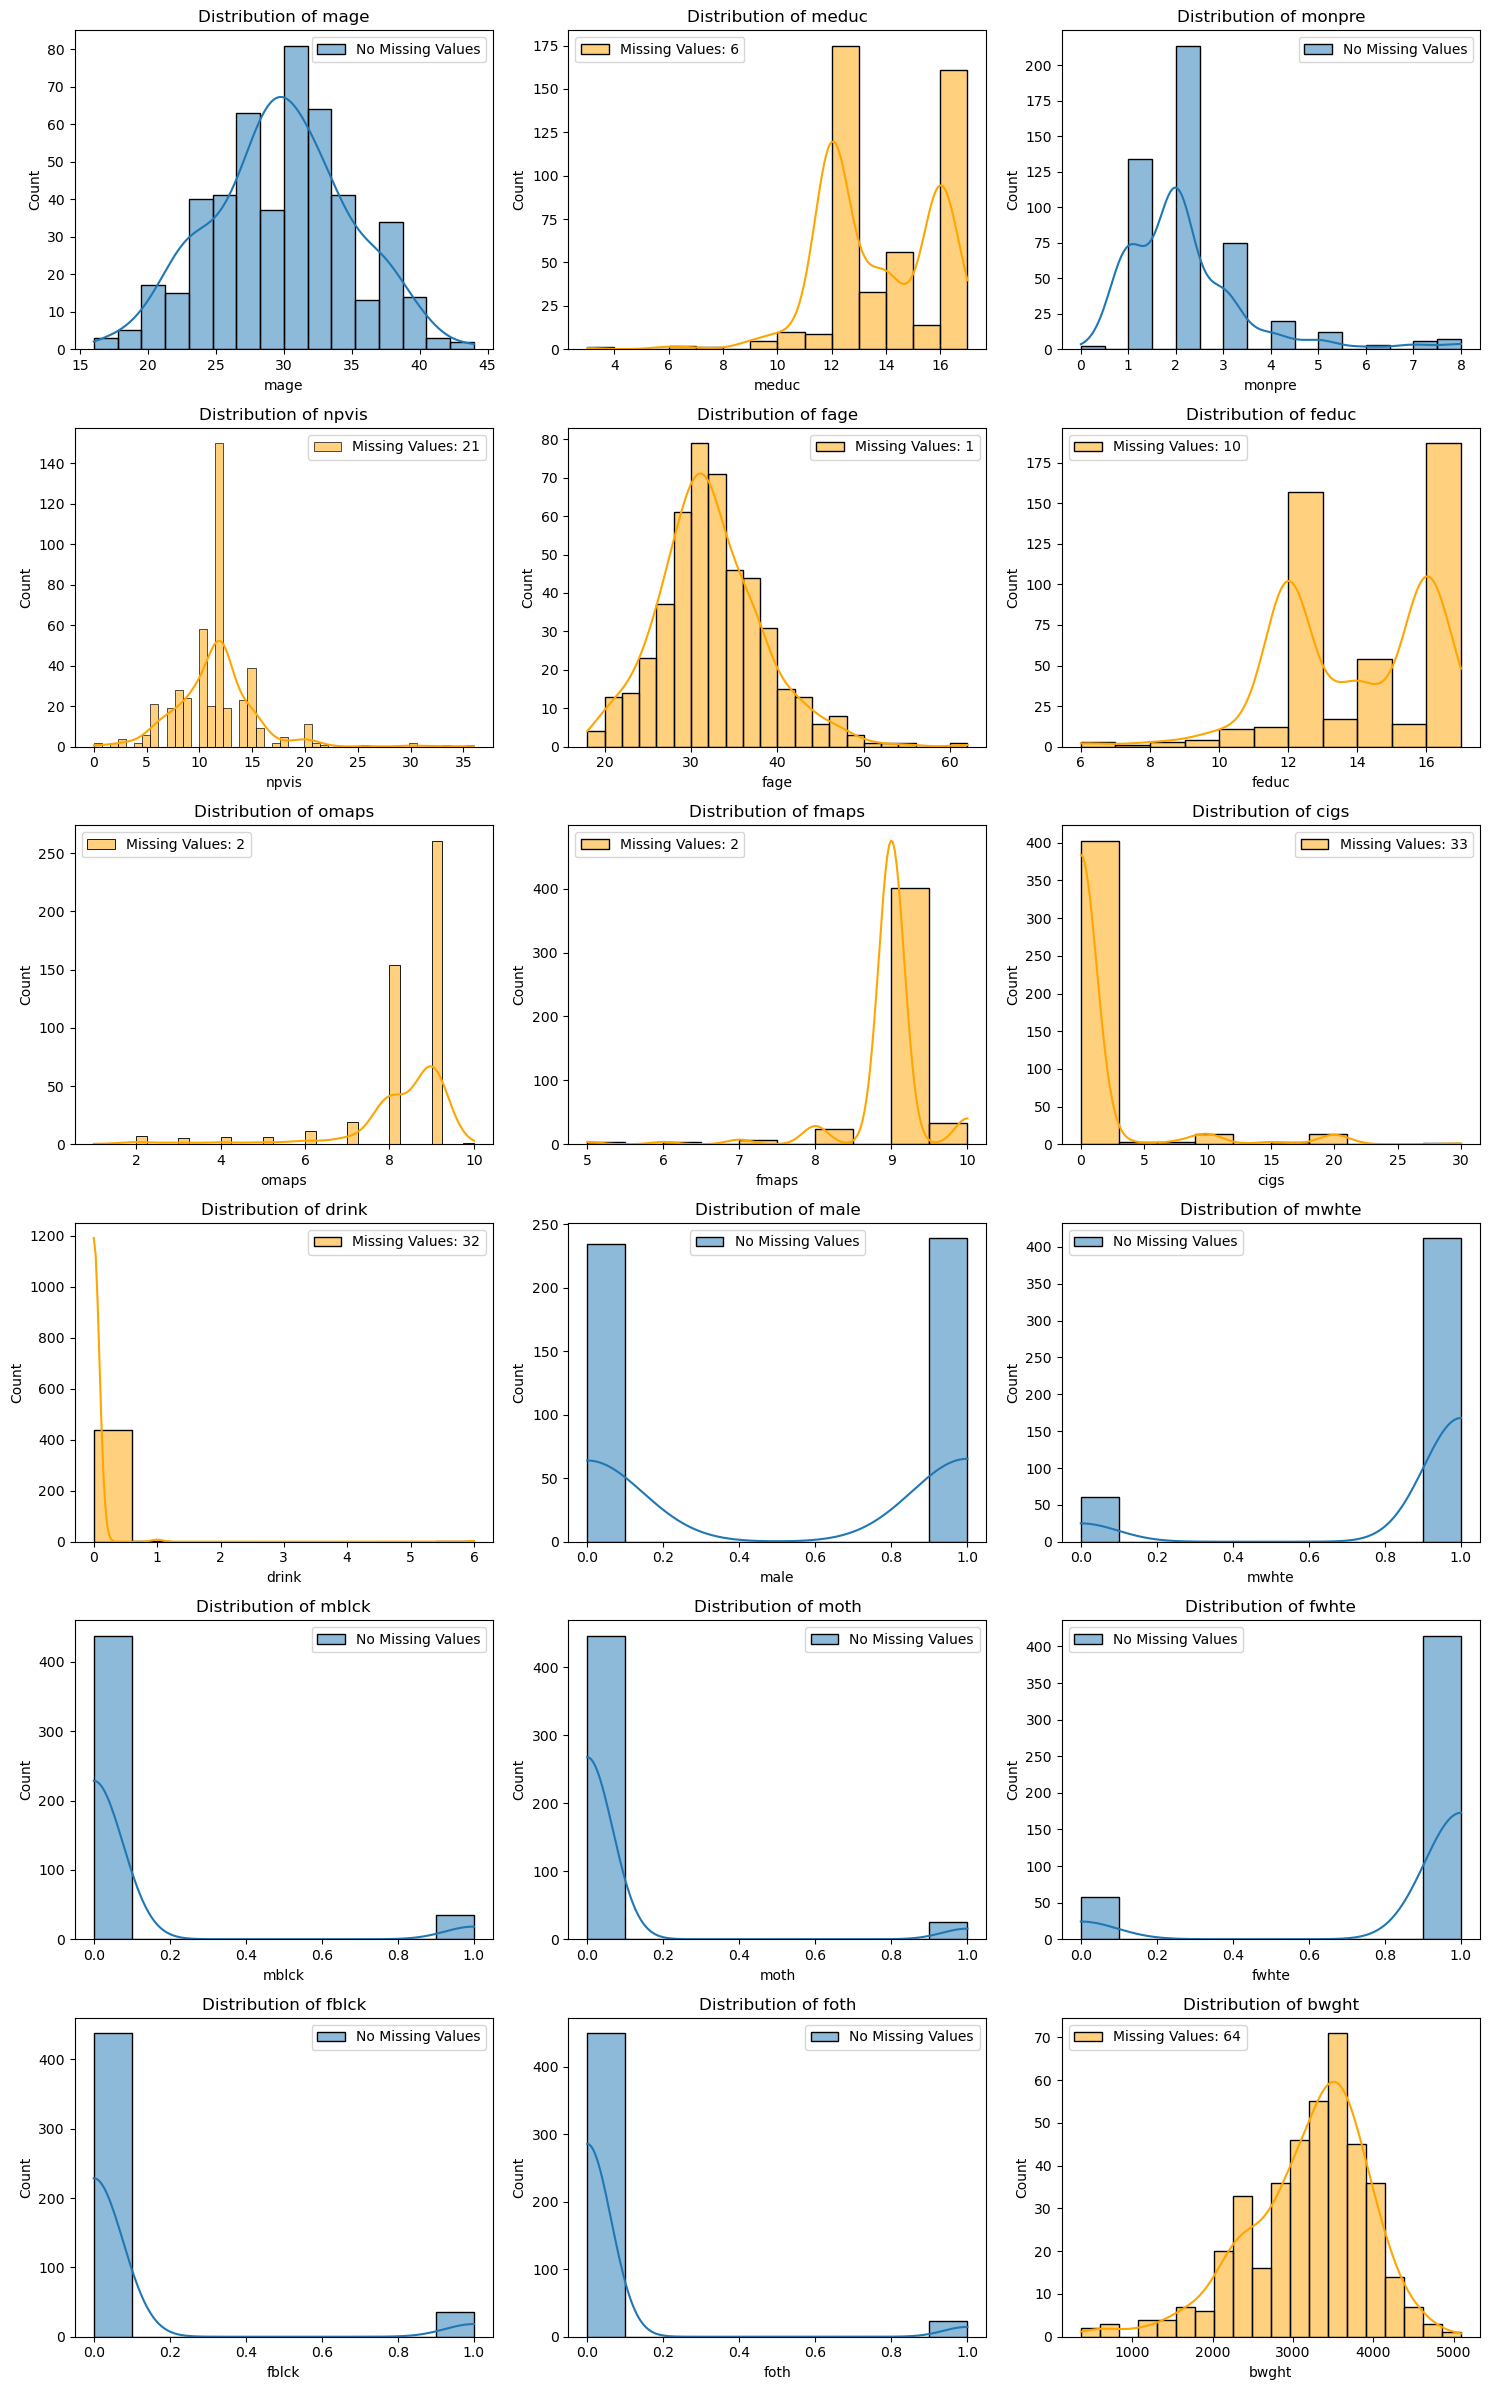

In [6]:
# Set up the number of rows and columns for the subplots based on the number of numeric columns in the DataFrame
num_cols = df_full.select_dtypes(include=np.number).columns.size
num_rows = (num_cols + 2) // 3

# Specify the size of the overall figure
plt.figure(figsize=(15, num_rows * 4))

# Loop through numeric columns for histogram plotting
# 'enumerate' adds a counter to an iterable for use in a loop (starts at 1 here).
for i, column in enumerate(df_full.select_dtypes(include=np.number).columns, 1):
    plt.subplot(num_rows, 3, i)
    # Check for missing values and get their count in the column
    missing = df_full[column].isnull().sum()
    if missing > 0:
        # If missing values exist in the column, use a distinct color
        sns.histplot(df_full[column], kde=True, color='orange', label=f'Missing Values: {missing}')
    else:
        # If there are no missing values, use the default color
        sns.histplot(df_full[column], kde=True, label='No Missing Values')
    plt.title(f'Distribution of {column}')
    plt.legend()

# Adjust the spacing between the plots for clarity
plt.tight_layout()
plt.show()

The offered graphics show histograms with different distributions of birthweight-related parameters, such as prenatal visits, timing of prenatal care, and maternal and father ages, each indicated by the presence or absence of missing values. Understanding the data's range and any outliers is essential for identifying potential birthweight-influencing variables. These graphics provide this information.A notable peak can be seen in the 'npvis' (number of prenatal visits) histogram in the range of 10 to 15 visits, which may represent a standard procedure or suggestion for prenatal visits. It also contains a significant quantity of missing data, though, which may have an impact on analyses regarding the effect of prenatal care on birthweight.
The distribution of "cigs," or the mother's average daily cigarette consumption, is skewed and peaks at zero, indicating that most moms said they did not smoke while pregnant. The lengthy tail towards the higher values, however, suggests that some moms reported higher intake, which raises the possibility of a lower birthweight.The multi-modal distributions displayed by the 'feduc' (father's education in years) and'meduc' (mother's education in years) histograms suggest that the parents in the dataset have similar educational backgrounds.
Birthweight in grams, or "bwght," exhibits a nearly normal distribution with a significant proportion of missing values, which is important because birthweight is the result of interest. The distribution is focused around the 3000-gram mark.

In [7]:
# Find columns with missing values
cols_with_na = df_full.columns[df_full.isnull().any()]

# Calculate mode, median, and mean for these columns
mode_values = df_full[cols_with_na].mode().iloc[0]
median_values = df_full[cols_with_na].median()
mean_values = df_full[cols_with_na].mean()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Mode': mode_values,
    'Median': median_values,
    'Mean': mean_values
})

# Print the summary DataFrame
print(summary_df)

         Mode  Median         Mean
meduc    12.0    13.0    13.680942
npvis    12.0    12.0    11.535398
fage     31.0    32.0    32.169492
feduc    12.0    14.0    13.866091
omaps     9.0     9.0     8.225053
fmaps     9.0     9.0     8.951168
cigs      0.0     0.0     1.172727
drink     0.0     0.0     0.020408
bwght  3345.0  3340.0  3189.870416


In [8]:
# imputing missing values
df_full['meduc'] = df_full['meduc'].fillna(value=df_full['meduc'].mode()[0])
df_full['npvis'] = df_full['npvis'].fillna(value=df_full['npvis'].mode()[0])
df_full['fage'] = df_full['fage'].fillna(value=df_full['fage'].mode()[0])
df_full['feduc'] = df_full['feduc'].fillna(value=df_full['feduc'].mode()[0])
df_full['omaps'] = df_full['omaps'].fillna(value=df_full['omaps'].mode()[0])
df_full['fmaps'] = df_full['fmaps'].fillna(value=df_full['fmaps'].mode()[0])
df_full['cigs'] = df_full['cigs'].fillna(value= 0)
df_full['drink'] = df_full['drink'].fillna(value= 0)

# checking results
df_full.isnull().sum(axis=0)

mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
omaps      0
fmaps      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght     64
set        0
dtype: int64

In [9]:
# Select only the numeric columns for correlation
df_numeric = df_full.select_dtypes(include=[np.number])

# Calculate the Pearson correlation matrix and round it to 4 decimal places
birth_corr = df_numeric.corr(method='pearson').round(decimals=4)

# Correlation of Birthweight with other columns
print("Correlation of Birthweight with other columns:")
print(birth_corr.loc['bwght'])

Correlation of Birthweight with other columns:
mage      0.0546
meduc     0.0003
monpre    0.0551
npvis     0.1805
fage      0.1392
feduc     0.0619
omaps     0.3825
fmaps     0.3687
cigs     -0.0297
drink    -0.0255
male      0.0611
mwhte     0.0154
mblck     0.0230
moth     -0.0494
fwhte     0.0168
fblck     0.0418
foth     -0.0746
bwght     1.0000
Name: bwght, dtype: float64


1.Are there any strong positive or strong negative linear (Pearson) correlations with birthweight? Answer this question based on the original, continuous form of birthweight.

There were no exceptionally strong linear connections between birthweight and the Pearson correlation analysis. Strong correlations usually have absolute values over 0.5 or below -0.5. One-minute Apgar scores (omaps) and five-minute Apgar scores (fmaps) showed somewhat positive relationships with birthweight (0.3825 and 0.3687, respectively). greater scores often imply healthier newborns with possibly greater birthweights. These scores evaluate a newborn's health immediately after birth. 
The number of prenatal visits (npvis) had a moderate positive correlation of 0.1805 with birthweight, suggesting that regular medical check-ups during pregnancy may be linked to higher birthweights. The father's age (fage) showed a slight positive correlation, and negative behaviors like smoking (cigs) and drinking (drink) during pregnancy had slight negative correlations with birthweight, as expected due to their known risks.

In [10]:
# low_bwght
df_full['low_bwght'] = (df_full['bwght'] < 2500).astype(int)

2.Is there an official threshold that signifies when birthweight gets more dangerous? In other words, is there a cutoff point between a healthy birthweight and a non-healthy birthweight? Provide credible sources as necessary.

A low birth weight is defined by the World Health Organization as less than 2,500 grams (5.5 pounds)(World Health Organization, 2023). The threshold point is a crucial marker for identifying newborns who could experience major health issues. Low birth weight is associated with a number of unfavorable health outcomes, including heightened vulnerability to infection, issues in gaining weight, and developmental delays. Long-term health problems, such as chronic illnesses later in life, are also linked to it. Low birth weight is still a global public health concern, despite being more common in developing nations. This emphasizes the need for sufficient services for the care of mothers and babies.(Default - Stanford Children’s Health, n.d.)

<h2><strong>Feature Engineering <strong>

In [11]:
# fage_group & mage_group

df_full['fage_group'] = pd.cut(df_full['fage'], bins=[0, 20, 30, 40, np.inf], labels=['<20', '20-30', '30-40', '40plus'])
# Create one hot encoded variables for the 'fage_group' feature
fage_group_dummies = pd.get_dummies(df_full['fage_group'], prefix='fage_group').astype(int)

# Join the one hot encoded variables back to the df_full dataframe
df_full = df_full.join(fage_group_dummies)

In [12]:
df_full['mage_group'] = pd.cut(df_full['mage'], bins=[0, 20, 30, 40, np.inf], labels=['<20', '20-30', '30-40', '40plus'])
# Create one hot encoded variables for the 'mage_group' feature
mage_group_dummies = pd.get_dummies(df_full['mage_group'], prefix='mage_group').astype(int)

# Join the one hot encoded variables back to the df_full dataframe
df_full = df_full.join(mage_group_dummies)

This divides the father's age and the mother's age into groups, from which binary variables are derived for each group. Combining continuous variables into groups can help to simplify the model and show nonlinear interactions with the target variable.(Reichman & Teitler, 2006)

In [13]:
# parents_education_avg
df_full['parents_education_avg'] = (df_full['meduc'] + df_full['feduc']) / 2

This averages the education level of the parents, postulating that the overall educational environment of the child, influenced by both parents, might have a combined effect on birthweight.This may suggest that the parents' educational attainment influences their prenatal care knowledge and practices, which in turn influences the baby's birthweight. Enhancing health awareness and education among potential parents may therefore be essential to improve neonatal health outcomes. (Sema et al., 2019)

In [14]:
# mage_cigs_interaction
df_full['mage_cigs_interaction'] = df_full['mage'] * df_full['cigs']

This creates an interaction term between the mother's age and cigarette usage, hypothesizing that the combined effect of these variables on birthweight may be different from their individual effects. For instance, the negative impact of smoking on birthweight might increase with the mother's age.

In [15]:
#smokes,drinks,smoke_and_drink
df_full['smokes'] = (df_full['cigs'] > 0).astype(int)
df_full['drinks'] = (df_full['drink'] > 0).astype(int)

In [16]:
df_full['smoke_and_drink'] = df_full['smokes'] + df_full['drinks']

Based on the notion that any level of smoking or drinking may have an impact on the health of the unborn child, these are binary indicators that show whether the mother smokes or drinks.By combining the two earlier variables, this hypothesis raises the possibility that drinking and smoking together could have a substantial impact.(Di et al., 2022)

In [17]:
# dropping features after encoding
df_full = df_full.drop(['mage_group','fage_group','omaps', 'fmaps'], axis = 1)


# checking results
df_full.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink',
       'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght',
       'set', 'low_bwght', 'fage_group_<20', 'fage_group_20-30',
       'fage_group_30-40', 'fage_group_40plus', 'mage_group_<20',
       'mage_group_20-30', 'mage_group_30-40', 'mage_group_40plus',
       'parents_education_avg', 'mage_cigs_interaction', 'smokes', 'drinks',
       'smoke_and_drink'],
      dtype='object')

In [18]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, bwt_1 to bwt_468
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mage                   473 non-null    int64  
 1   meduc                  473 non-null    float64
 2   monpre                 473 non-null    int64  
 3   npvis                  473 non-null    float64
 4   fage                   473 non-null    float64
 5   feduc                  473 non-null    float64
 6   cigs                   473 non-null    float64
 7   drink                  473 non-null    float64
 8   male                   473 non-null    int64  
 9   mwhte                  473 non-null    int64  
 10  mblck                  473 non-null    int64  
 11  moth                   473 non-null    int64  
 12  fwhte                  473 non-null    int64  
 13  fblck                  473 non-null    int64  
 14  foth                   473 non-null    int64  
 15  bwg

In [19]:
########################################
# standard_scaler
########################################
def standard_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df


########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # number of features to plot
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')


In [20]:
# creating feature sets
continuous     = ['low_bwght', 'mage', 'meduc','monpre','npvis','fage','feduc','cigs','drink','mage_cigs_interaction','parents_education_avg']

non_continuous = ['low_bwght', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
                   'foth','fage_group_<20','fage_group_20-30', 'fage_group_30-40', 'fage_group_40plus',
                   'mage_group_<20', 'mage_group_20-30', 'mage_group_30-40','mage_group_40plus',
                   'smokes', 'drinks', 'smoke_and_drink']


# pearson correlation
df_full_corr = df_full[ continuous ].corr(method = 'pearson').round(decimals = 4)


# phi coefficient
df_full_phi_corr = df_full[ non_continuous ].phik_matrix(interval_cols = non_continuous).round(decimals = 4)


# checking results
print(f"""
Point-Biserial Correlations
---------------------------
{df_full_corr.loc[ : , 'low_bwght'].sort_values(ascending = False)}


Phi Coefficients
----------------
{df_full_phi_corr.loc[ : , 'low_bwght' ].sort_values(ascending = False)}
""")


Point-Biserial Correlations
---------------------------
low_bwght                1.0000
mage_cigs_interaction    0.0496
cigs                     0.0495
meduc                    0.0218
parents_education_avg    0.0031
drink                   -0.0103
feduc                   -0.0156
mage                    -0.0351
monpre                  -0.0527
fage                    -0.0800
npvis                   -0.1199
Name: low_bwght, dtype: float64


Phi Coefficients
----------------
low_bwght            1.0000
mage_group_<20       0.0501
fage_group_40plus    0.0457
mwhte                0.0181
fage_group_30-40     0.0000
drinks               0.0000
smokes               0.0000
mage_group_40plus    0.0000
mage_group_30-40     0.0000
mage_group_20-30     0.0000
fage_group_20-30     0.0000
male                 0.0000
fage_group_<20       0.0000
foth                 0.0000
fblck                0.0000
fwhte                0.0000
moth                 0.0000
mblck                0.0000
smoke_and_drink    

3.After transforming birthweight (bwght) using this threshold, did correlations and/or phi coefficients improve? Why or why not? 

The point-biserial correlations reveal a somewhat positive association with the interaction between mother's age and smoking (mage_cigs_interaction) at 0.0496 after birthweight is converted into a binary variable (low birthweight). There are no significant relationships at all or very weak correlations for other factors. With regard to the phi coefficients, age groupings (mage_group_<20 and fage_group_40plus) show the highest correlations.
"Improvement" in this sense refers to whether the relationships' significance and strength have grown. There are no clearer correlations for the point-biserial correlations, with the exception of the smoking interaction. Age groups exhibit stronger connections with low birthweight with the phi coefficients. This may be because birthweight has gone through a binary transformation that emphasizes correlations with certain risk variables, such as age and smoking habits.

In [21]:
df_numeric = df_full.select_dtypes(include=[np.number])

# calculate & round skewness
numeric_skew = df_numeric.skew().round(decimals=2)

# print
print(numeric_skew)

mage                     -0.01
meduc                    -0.38
monpre                    2.12
npvis                     1.38
fage                      0.65
feduc                    -0.42
cigs                      4.10
drink                    19.55
male                     -0.02
mwhte                    -2.22
mblck                     3.27
moth                      3.92
fwhte                    -2.31
fblck                     3.27
foth                      4.21
bwght                    -0.82
low_bwght                 1.77
fage_group_<20            6.68
fage_group_20-30          0.50
fage_group_30-40         -0.04
fage_group_40plus         2.86
mage_group_<20            5.17
mage_group_20-30         -0.13
mage_group_30-40          0.31
mage_group_40plus         9.60
parents_education_avg    -0.40
mage_cigs_interaction     4.34
smokes                    2.95
drinks                   10.77
smoke_and_drink           3.37
dtype: float64


In [22]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()


# dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

In [23]:
# train/test split with the full model
bwght_data   = df[['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink',
                  'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth','mage_cigs_interaction', 
                  'fage_group_<20','fage_group_20-30', 'fage_group_30-40', 'fage_group_40plus',
                  'mage_group_<20', 'mage_group_20-30', 'mage_group_30-40',
                  'mage_group_40plus', 'parents_education_avg', 'smokes',
                  'drinks', 'smoke_and_drink']]
bwght_target = df['low_bwght']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(
            bwght_data,
            bwght_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = bwght_target) # preserving balance


# merging training data for statsmodels
bwght_train  = pd.concat([x_train, y_train], axis = 1)

In [25]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
low_bwght
0    0.8
1    0.2
Name: proportion, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
low_bwght
0    0.81
1    0.19
Name: proportion, dtype: float64



In [26]:
for val in bwght_data:
    print(f" {val} + ")

 mage + 
 meduc + 
 monpre + 
 npvis + 
 fage + 
 feduc + 
 cigs + 
 drink + 
 male + 
 mwhte + 
 mblck + 
 moth + 
 fwhte + 
 fblck + 
 foth + 
 mage_cigs_interaction + 
 fage_group_<20 + 
 fage_group_20-30 + 
 fage_group_30-40 + 
 fage_group_40plus + 
 mage_group_<20 + 
 mage_group_20-30 + 
 mage_group_30-40 + 
 mage_group_40plus + 
 parents_education_avg + 
 smokes + 
 drinks + 
 smoke_and_drink + 


In [27]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """
low_bwght ~ monpre + 
npvis +  
male + 
mage_cigs_interaction +  
Q('fage_group_40plus') + 
Q('mage_group_30-40') +
parents_education_avg+
smokes
""", data = bwght_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.464144
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit              Method:             MLE     
Dependent Variable:    low_bwght          Pseudo R-squared:   0.062   
Date:                  2024-04-06 14:42   AIC:                302.0559
No. Observations:      306                BIC:                335.5682
Df Model:              8                  Log-Likelihood:     -142.03 
Df Residuals:          297                LL-Null:            -151.44 
Converged:             1.0000             LLR p-value:        0.015775
No. Iterations:        6.0000             Scale:              1.0000  
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Intercept               1.0464   1.4135  0.7403 0.4591 -1.7241  3.8168
monpre                 -0.3243   0.1465 -2.2136 0.0269 -0.6114 -0.0372
npvis                  -0.1353   0.0502 -2.6921 0.0071 -0.2338 -0.0368
male                   -0.4585   0.3031 -1.5124 0.1304 -1.0526  0.1357
mage_cigs_interaction  -0.0029   0.0027 -1.0683 0.2854 -0.0081  0.0024
Q('fage_group_40plus') -1.0313   0.6491 -1.5887 0.1121 -2.3036  0.2410
Q('mage_group_30-40')   0.4552   0.3147  1.4461 0.1481 -0.1617  1.0720
parents_education_avg  -0.0131   0.0878 -0.1487 0.8818 -0.1852  0.1591
smokes                  0.9435   1.0193  0.9256 0.3546 -1.0543  2.9414
======================================================================

"""

With P-values of 0.0269 and 0.0071, respectively, the logit model output indicates that the timing of prenatal care (monpre) and the number of prenatal visits (npvis) are significant in predicting low birth weight. Birth outcomes appear to be influenced by these factors, with early and regular care being crucial. P-values above the 0.05 cut off indicate that the baby's gender (male), fathers' age groups (fage_group_40plus and fage_group_30_40), parents' average education (parents_education_avg), and parental age interactions with smoking (mage_cigs_interaction) are not significant predictors in this model. Furthermore lacking statistical significance is the mother's smoking status (smoke). Although this model demonstrates that not all predicted components are statistically significant, P-values below 0.05 often indicate significant predictors.

In [28]:
# creating a dictionary to store candidate models


candidate_dict = {

 # full model
 'logit_full'   : ['monpre','npvis', 'male','mage_cigs_interaction','fage_group_40plus','mage_group_30-40','parents_education_avg','smokes'],
 # p-value significant variables only
 'logit_sig'  : ['monpre', 'npvis']
 
}


In [29]:
# # standardizing the x-features
x_data_st = standard_scaler(df = bwght_data)


# # checking results
x_data_st.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,...,fage_group_30-40,fage_group_40plus,mage_group_<20,mage_group_20-30,mage_group_30-40,mage_group_40plus,parents_education_avg,smokes,drinks,smoke_and_drink
0,-0.361492,-0.761169,-0.165141,-0.416957,-0.202130,1.406394,-0.269856,-0.071442,-0.978232,0.381652,...,0.973457,-0.324662,-0.181186,0.931440,-0.851903,-0.111249,0.387133,-0.310668,-0.099381,-0.304873
1,-1.728666,-0.761169,-0.915613,-1.469643,-1.835949,-0.837035,-0.269856,-0.071442,-0.978232,0.381652,...,-1.027266,-0.324662,-0.181186,0.931440,-0.851903,-0.111249,-0.904362,-0.310668,-0.099381,-0.304873
2,-0.556802,0.634876,-0.165141,-0.153785,-0.038748,0.957708,-0.269856,-0.071442,1.022252,0.381652,...,0.973457,-0.324662,-0.181186,0.931440,-0.851903,-0.111249,0.903730,-0.310668,-0.099381,-0.304873
3,0.615061,1.565572,-0.915613,2.214760,1.104925,1.406394,-0.269856,-0.071442,-0.978232,-2.620188,...,0.973457,-0.324662,-0.181186,-1.073607,1.173843,-0.111249,1.678627,-0.310668,-0.099381,-0.304873
4,0.029129,0.634876,-0.165141,0.109387,0.614779,0.957708,-0.269856,-0.071442,1.022252,0.381652,...,0.973457,-0.324662,-0.181186,0.931440,-0.851903,-0.111249,0.903730,-0.310668,-0.099381,-0.304873


In [30]:
# # train/test split with the full model
bwght_data   = x_data_st[candidate_dict['logit_full']]
bwght_target = df['low_bwght']


# # this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
             bwght_data,
             bwght_target,
             random_state = 702,
             test_size    = 0.25,
             stratify     = bwght_target)

<h2><strong>Candidate Model Development <strong>

<strong>LogisticRegression <strong>

In [31]:
# INSTANTIATING model
model = sklearn.linear_model.LogisticRegression(solver = 'lbfgs',
                                                 C = 1,
                                                 random_state = 702)


# FITTING the training data
logreg_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)

# saving scoring data for future use
train_score = round(logreg_fit.score(x_train, y_train), ndigits = 4) # train accuracy
test_score  = round(logreg_fit.score(x_test, y_test),   ndigits = 4) # test accuracy
tt_gap      = round(abs(train_score - test_score),      ndigits = 4) # gap

# displaying and saving the gap between training and testing
print(f"""\
Training ACCURACY: {train_score}
Testing  ACCURACY: {test_score}
Train-Test Gap   : {tt_gap}
""") 

Training ACCURACY: 0.8007
Testing  ACCURACY: 0.8058
Train-Test Gap   : 0.0051



In [32]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[83  0]
 [20  0]]


In [33]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 83
False Positives: 0
False Negatives: 20
True Positives : 0



In [34]:
# preparing AUC, precision, and recall
auc       = round(roc_auc_score(y_true = y_test, y_score = logreg_pred) , ndigits = 4)
precision = round(precision_score(y_true = y_test, y_pred = logreg_pred), ndigits = 4)
recall    = round(recall_score(y_true = y_test, y_pred = logreg_pred)   , ndigits = 4)


# dynamically printing metrics
print(f"""\
AUC:       {auc}
Precision: {precision}
Recall:    {recall}
""")

AUC:       0.5
Precision: 0.0
Recall:    0.0



In [35]:
# printing the predicted probabilities of 0 and 1, respectively
pd.DataFrame(data = logreg_fit.predict_proba(bwght_data).round(decimals = 2),
             columns = ['Class 0', 'Class 1']).head(n = 10)

,Class 0,Class 1
0,0.80,0.20
1,0.65,0.35
2,0.81,0.19
3,0.91,0.09
4,0.83,0.17
5,0.81,0.19
6,0.81,0.19
7,0.82,0.18
8,0.87,0.13
9,0.80,0.20


<strong>Random Forest Classification<strong>

In [36]:
# INSTANTIATING model
model     = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 702)

In [37]:
# FITTING the training data
rf_default_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(rf_default_fit.score(x_train, y_train), ndigits = 4))
print('Testing  ACCURACY:', round(rf_default_fit.score(x_test , y_test ), ndigits = 4))


# saving AUC score
print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = rf_default_fit_pred), ndigits = 4))

Training ACCURACY: 0.9575
Testing  ACCURACY: 0.7184
AUC Score        : 0.5217


In [38]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 70
False Positives: 13
False Negatives: 16
True Positives : 4



In [39]:
# preparing AUC, precision, and recall
auc       = round(roc_auc_score(y_true = y_test, y_score = rf_default_fit_pred) , ndigits = 4)
precision = round(precision_score(y_true=y_test, y_pred=rf_default_fit_pred), ndigits=4)
recall = round(recall_score(y_true=y_test, y_pred=rf_default_fit_pred), ndigits=4)

# printing each result one-by-one
print(f"""\
AUC :{auc}
Precision: {precision}
Recall:    {recall}
""")

AUC :0.5217
Precision: 0.2353
Recall:    0.2



<strong>Ridge Classification (Final Model)<strong>

In [40]:
######## Final Model########
# INSTANTIATING model
model     = RidgeClassifier(alpha=1.0, 
                            solver='auto', 
                            random_state=702)
# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_fit_pred = model_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(model_fit.score(x_train, y_train), ndigits = 4))
print('Testing  ACCURACY:', round(model_fit.score(x_test , y_test ), ndigits = 4))


# saving AUC score
print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = model_fit_pred), ndigits = 4))

Training ACCURACY: 0.8007
Testing  ACCURACY: 0.8058
AUC Score        : 0.5


In [41]:
# unpacking the confusion matrix
tn, \
fp, \
fn, \
tp = confusion_matrix(y_true = y_test,
                               y_pred = model_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tn}
False Positives: {fp}
False Negatives: {fn}
True Positives : {tp}
""")


True Negatives : 83
False Positives: 0
False Negatives: 20
True Positives : 0



In [42]:
# instantiating a hyperparameter space
alpha_range = np.logspace(-4, 4, 20)  
solver_range = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'] 


# creating a hyperparameter grid
param_distributions = {
    'alpha': alpha_range,
    'solver': solver_range
}


# INSTANTIATING the model object without hyperparameters
ridge_model = RidgeClassifier(random_state=702)

# GridSearchCV object
ridge_cv = RandomizedSearchCV(estimator=ridge_model,
                              param_distributions=param_distributions,
                              cv=5,  
                              n_iter=10,  
                              scoring=make_scorer(roc_auc_score, needs_threshold=True),
                              random_state=702)



# FITTING to the FULL DATASET (due to cross-validation)
ridge_cv.fit(bwght_data, bwght_target)



# printing the optimal parameters and best score
print("Tuned Parameters  :", ridge_cv.best_params_)
print("Tuned Training AUC:", ridge_cv.best_score_.round(4))

#'solver': 'saga', 'alpha': 78.47599703514607

Tuned Parameters  : {'solver': 'saga', 'alpha': 78.47599703514607}
Tuned Training AUC: 0.5435


In [43]:
# best estimators based on ridge
ridge_cv.best_estimator_

RidgeClassifier(alpha=78.47599703514607, random_state=702, solver='saga')

In [44]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
model = RidgeClassifier(alpha=78.47599703514607,  
                        solver='saga',
                        random_state=702)


# FITTING to the FULL DATASET (due to cross-validation)
ridge_tuned_fit = model.fit(bwght_data, bwght_target)


# PREDICTING on the testing set
ridge_tuned_pred = ridge_tuned_fit.predict(x_test)


# saving scoring data for future use
ridge_tuned_train_score = round(model.score(x_train, y_train), 4)
ridge_tuned_test_score = round(model.score(x_test, y_test), 4)


# SCORING the results
print('Training ACCURACY:', round(ridge_tuned_fit.score(x_train, y_train),
                                  ndigits = 4))


print('Testing  ACCURACY:', round(ridge_tuned_fit.score(x_test, y_test),
                                  ndigits = 4))


print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = ridge_tuned_pred),
                                  ndigits = 4))


Training ACCURACY: 0.8039
Testing  ACCURACY: 0.8058
AUC Score        : 0.5


In [45]:
# unpacking the confusion matrix
ridge_tuned_tn, \
ridge_tuned_fp, \
ridge_tuned_fn, \
ridge_tuned_tp = confusion_matrix(y_true = y_test,
                               y_pred = ridge_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {ridge_tuned_tn}
False Positives: {ridge_tuned_fp}
False Negatives: {ridge_tuned_fn}
True Positives : {ridge_tuned_tp}
""")


True Negatives : 83
False Positives: 0
False Negatives: 20
True Positives : 0



In [46]:
# preparing AUC, precision, and recall
auc = round(roc_auc_score(y_true  = y_test,y_score = ridge_tuned_pred), 4)
precision = round(precision_score(y_true=y_test, y_pred=ridge_tuned_pred), 4)
recall = round(recall_score(y_true=y_test, y_pred=ridge_tuned_pred), 4)



print(f"""\
AUC :{auc}
Precision: {precision}
Recall:    {recall}
""")

AUC :0.5
Precision: 0.0
Recall:    0.0



<strong>GBM Classification<strong>

In [47]:
# INSTANTIATING model
model = GradientBoostingClassifier(loss          = 'log_loss',
                                   learning_rate = 0.1,
                                   n_estimators  = 100,
                                   criterion     = 'friedman_mse',
                                   max_depth     = 3,
                                   warm_start    = False,
                                   random_state  = 702)


# FITTING to the training data
full_gbm_def_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_def_pred = full_gbm_def_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(full_gbm_def_fit.score(x_train, y_train),
                                  ndigits = 4))
      
print('Testing ACCURACY :', round(full_gbm_def_fit.score(x_test, y_test),
                                  ndigits = 4))
      
print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = full_gbm_def_pred),
                                  ndigits = 4))

Training ACCURACY: 0.8824
Testing ACCURACY : 0.7864
AUC Score        : 0.5828


In [48]:
# unpacking the confusion matrix
gbm_def_tn, \
gbm_def_fp, \
gbm_def_fn, \
gbm_def_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_def_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_def_tn}
False Positives: {gbm_def_fp}
False Negatives: {gbm_def_fn}
True Positives : {gbm_def_tp}
""")


True Negatives : 76
False Positives: 7
False Negatives: 15
True Positives : 5



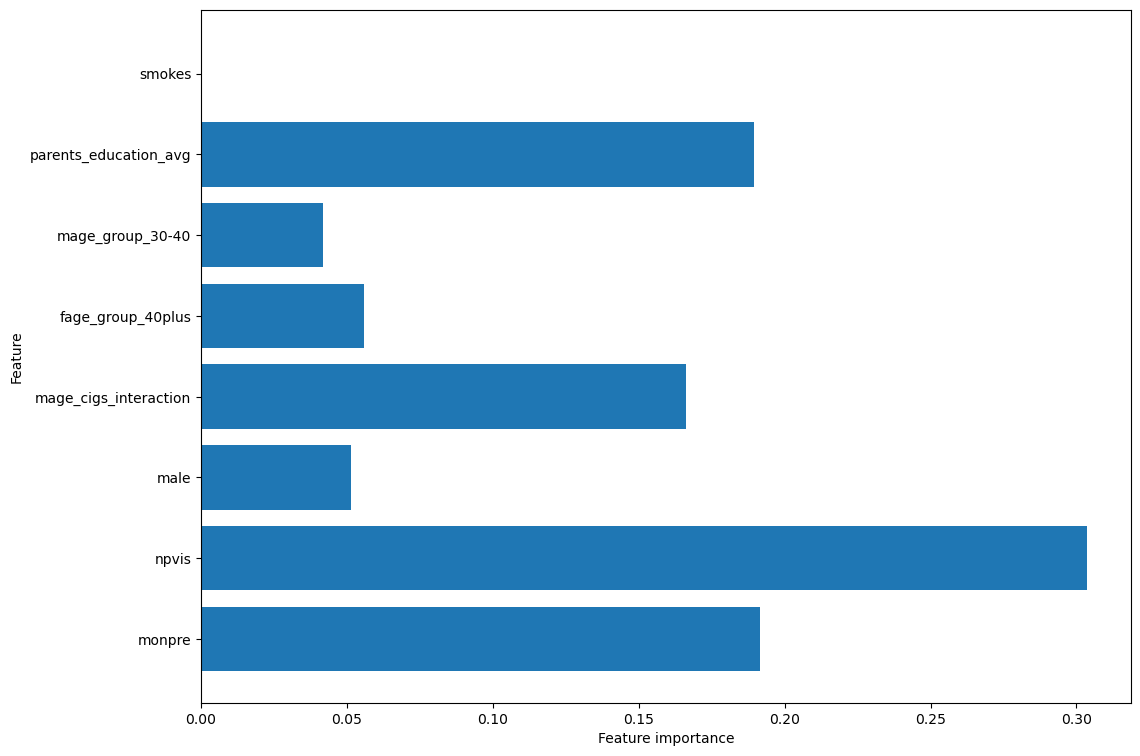

In [49]:
# plotting feature importances
plot_feature_importances(full_gbm_def_fit,
                         train = x_train,
                         export = False)

In the feature importance plot from the Gradient Boosting Classifier, 'npvis' emerges as the most influential variable, underscoring the critical role of prenatal visit frequency in predicting low birth weight. Following closely, 'parents_education_avg' marks its significance, pointing to the combined educational level of the parents as a key factor. Additionally, 'monpre' takes a notable position, indicating that the timing of prenatal care initiation is an important predictive element. The visual length of the bars conveys the relative importance of each feature, with these three collectively having a substantial impact on the model's predictive accuracy for birth weight outcomes.

In [50]:
# instantiating a hyperparameter space
learn_range        = np.arange(0.1, 2.2, 0.5)
estimator_range    = np.arange(50, 301, 50)
depth_range        = np.arange(2, 7, 1)
warm_start_range   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_range,
              'max_depth'     : depth_range,
              'n_estimators'  : estimator_range,
              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 702)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 20,
                           random_state        = 702,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(bwght_data, bwght_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

#'warm_start': False, 'n_estimators': 100, 'max_depth': 2, 'learning_rate': 1.6

Tuned Parameters  : {'warm_start': False, 'n_estimators': 100, 'max_depth': 2, 'learning_rate': 1.6}
Tuned Training AUC: 0.5406


In [51]:
# checking the best estimator for the model
full_gbm_cv.best_estimator_

GradientBoostingClassifier(learning_rate=1.6, max_depth=2, random_state=702)

In [52]:
# INSTANTIATING with best_estimator
model = GradientBoostingClassifier(learning_rate = 1.6,
                                    max_depth     = 2,
                                    n_estimators  = 100,
                                    warm_start    = False,
                                    random_state  = 702)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = model.fit(bwght_data, bwght_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', round(gbm_tuned_fit.score(x_train, y_train),
                                  ndigits = 4))


print('Testing  ACCURACY:', round(gbm_tuned_fit.score(x_test, y_test),
                                  ndigits = 4))


print('AUC Score        :', round(roc_auc_score(y_true  = y_test,
                                                y_score = gbm_tuned_pred),
                                  ndigits = 4))


Training ACCURACY: 0.817
Testing  ACCURACY: 0.8155
AUC Score        : 0.525


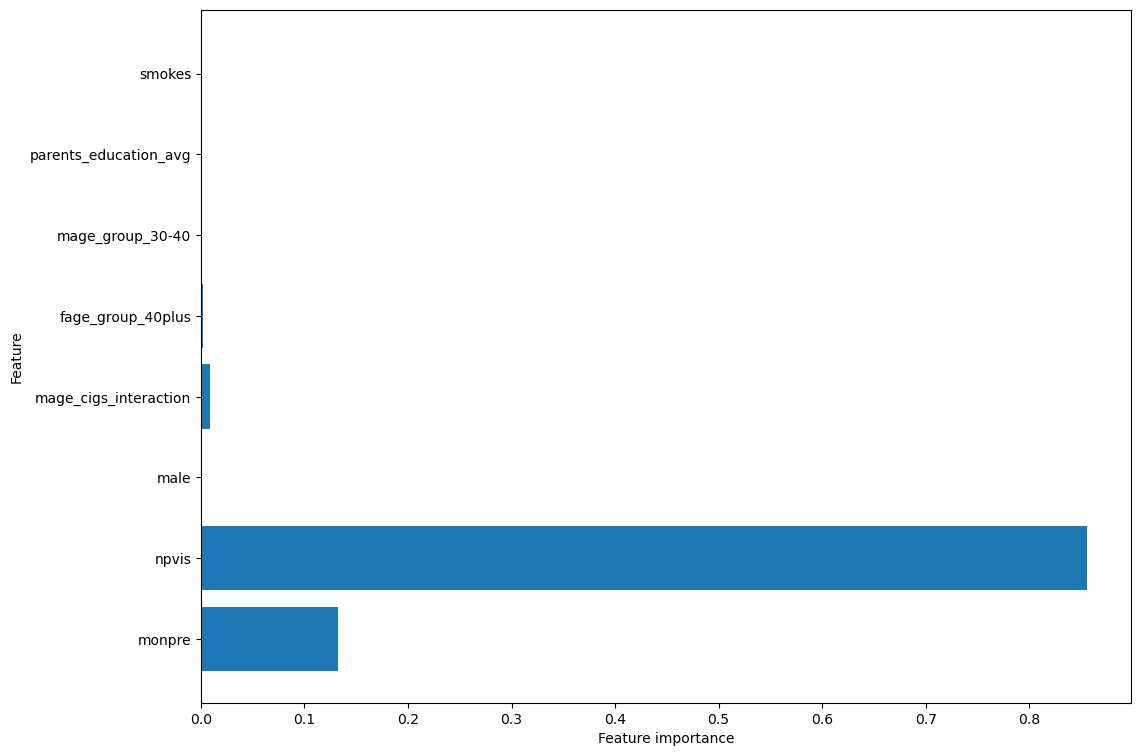

In [53]:
# plotting feature importances
plot_feature_importances(gbm_tuned_fit,
                         train = x_train,
                         export = False)

In the optimized Gradient Boosting Classifier model, 'npvis' retains its position as the most impactful feature for predicting low birth weight, which highlights the importance of the number of prenatal visits. 'Monpre' has surged in significance, indicating the model's increased weighting on the timing of prenatal care initiation. Compared to these two features, the impact of others is markedly less, underlining their relative insignificance in this particular predictive framework. The bar lengths in the chart are telling, with 'npvis' leading significantly and 'monpre'. Following as a substantial but second-most important factor, emphasizing their pivotal roles after model fine-tuning.

In [54]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 83
False Positives: 0
False Negatives: 19
True Positives : 1



In [55]:
# preparing AUC, precision, and recall
auc = round(roc_auc_score(y_true=y_test, y_score=gbm_tuned_pred), 4)
precision = round(precision_score(y_true=y_test, y_pred=gbm_tuned_pred), 4)
recall = round(recall_score(y_true=y_test, y_pred=gbm_tuned_pred), 4)


# printing each result one-by-one
print(f"""\
AUC :{auc}
Precision: {precision}
Recall:    {recall}
""")

AUC :0.525
Precision: 1.0
Recall:    0.05



4.Which two features in your machine learning model had the largest impact on birthweight? Present one actionable insight for each of these. 

In the provided machine learning model（ logit model output & GradientBoostingClassifier tuned plot_feature_importances), the month of pregnancy that prenatal care began (monpre) and the total number of prenatal visits (npvis) emerge as the features with the largest impact on birth weight. Both features carry significant P-values of 0.0269 and 0.0071, respectively, indicating strong evidence against the null hypothesis and thus affirming their relevance in predicting low birth weight.

The 'monpre' feature highlights the importance of the timing of prenatal care initiation. An actionable insight from this data is that early initiation of prenatal care is crucial. Pregnant individuals should be encouraged to seek prenatal care as soon as they become aware of their pregnancy. This early intervention allows for the timely identification and management of any health risks that could contribute to low birth weight, potentially improving outcomes for newborns. By prioritizing early prenatal visits, healthcare providers can offer critical guidance and support, helping to mitigate factors that lead to low birthweight.(Alexander & Korenbrot, 1995)

The number of prenatal visits, denoted as 'npvis' in our model, emerges as a critical determinant in the prediction of birth weight. This finding aligns with a study conducted in northeastern Brazil, where women with fewer than four prenatal visits had significantly higher odds of delivering low birth weight and preterm infants (Teixeira et al., 2022). Our model suggests a similar trend, underscoring the importance of adequate prenatal care. Consequently, healthcare interventions should prioritize encouraging consistent prenatal appointments. While the typical range of prenatal visits is 10 to 15 (Price, 2015), our analysis indicates that increased visit frequency could be a marker of proactive health measures taken in response to fetal health risks identified early in the pregnancy, such as potential low birth weight. To optimize prenatal care's impact on preventing low birth weight, reminder systems and support networks could be established to ensure that pregnant women adhere to their checkup schedules, facilitating timely interventions and improving overall neonatal health outcomes. This strategic approach not only serves as a preventive measure but also as a vital component of early intervention to address potential health concerns.(Novoa, 2020)

These insights highlight the importance of proactive and ongoing involvement in prenatal care, with a focus on interventions at various stages of the prenatal journey. The first insight emphasizes the need of starting prenatal care as early as possible to guarantee a good start, and the second emphasizes the relevance of continuing prenatal appointments on a regular basis to ensure an optimal pregnancy outcome.

5.Present your final model's confusion matrix and explain what each error means (false positives and false negatives). Furthermore, explain which error is being controlled for given the cohort's focus on correctly predicting low birthweight, as well as why this error is more important to control than the other error.

The confusion matrix for Ridge regression model shows 83 true negatives (TN), meaning 83 cases were correctly identified as not having low birthweight. There were 20 false negatives (FN), where the model incorrectly predicted normal birthweight when, in fact, the babies had low birthweight. There were no false positives (FP), meaning the model did not incorrectly predict any cases as low birthweight when they were not. Importantly, there were no true positives (TP), meaning the model failed to correctly identify any cases of low birthweight.
Considering the emphasis on forecasting low birthweight, it is imperative to account for false negatives. False negative results indicate lost chances to give at-risk babies early support and intervention. If the model's predictions were correct, they may have the most effects in these situations. On the other hand, false positives do not carry the same risk of unfavorable outcomes if left untreated, even though they can cause needless stress and procedures. 
Therefore, the cost of a false negative is usually regarded as larger than a false positive in the context of healthcare, especially for vulnerable groups like infants. The model needs to be further refined, maybe by adding additional relevant characteristics or modifying the threshold to make the model more sensitive to cases of low birthweight. This is shown by the model's inability to identify true positives.

In [56]:
# x_features = ['monpre','npvis', 'male','mage_cigs_interaction','fage_group_40plus','mage_group_30-40','parents_education_avg','smokes']

# y_variable = "low_bwght"

# # x-data
# x_data_kaggle = kaggle_data[x_features].copy()

# # y-data
# y_data_kaggle = kaggle_data[y_variable]

# # Fitting model from above to the Kaggle test data
# kaggle_predictions = model.predict(x_data_kaggle)


# # organizing predictions
# model_predictions = {"low_bwght" : kaggle_predictions}


# # converting predictions into df
# model_pred_df = pd.DataFrame(data  = model_predictions,
#                              index = df_test.index)
# # ## Kaggle Submission File ##

# # sending predictions to .csv
# model_pred_df.to_csv(path_or_buf = "/Users/Vivi/Downloads/ RIDGE Final.csv",
#                      index       = True,
#                     index_label = 'bwt_id')

References
Alexander, G. R., & Korenbrot, C. C. (1995). The Role of Prenatal Care in Preventing Low Birth Weight. The Future of Children, 5(1), 103–120. https://doi.org/10.2307/1602510default - Stanford Children’s Health. (n.d.). Www.stanfordchildrens.org. https://www.stanfordchildrens.org/en/topic/default?id=low-birth-weight-90-P02382Di, H.-K., Gan, Y., Lu, K., Wang, C., Zhu, Y., Meng, X., Xia, W.-Q., Xu, M.-Z., Feng, J., Tian, Q.-F., He, Y., Nie, Z.-Q., Liu, J.-A., Song, F.-J., & Lu, Z.-X. (2022). Maternal smoking status during pregnancy and low birth weight in offspring: systematic review and meta-analysis of 55 cohort studies published from 1986 to 2020. World Journal of Pediatrics, 18, 176–185. https://doi.org/10.1007/s12519-021-00501-5Günther, V., Alkatout, I., Vollmer, C., Maass, N., Strauss, A., & Voigt, M. (2021). Impact of nicotine and maternal BMI on fetal birth weight. BMC Pregnancy and Childbirth, 21(1). https://doi.org/10.1186/s12884-021-03593-zNovoa, C. (2020, January 31). Ensuring Healthy Births Through Prenatal Support. Center for American Progress. https://www.americanprogress.org/article/ensuring-healthy-births-prenatal-support/Price, S. (2015, June 4). What’s the Cost of Prenatal Care? ValuePenguin; ValuePenguin. https://www.valuepenguin.com/cost-prenatal-care-health-insuranceReichman, N. E., & Teitler, J. O. (2006). Paternal Age as a Risk Factor for Low Birthweight. American Journal of Public Health, 96(5), 862–866. https://doi.org/10.2105/ajph.2005.066324Sema, A., Tesfaye, F., Belay, Y., Amsalu, B., Bekele, D., & Desalew, A. (2019). Associated Factors with Low Birth Weight in Dire Dawa City, Eastern Ethiopia: A Cross-Sectional Study. BioMed Research International, 2019, 1–8. https://doi.org/10.1155/2019/2965094Teixeira, G. A., Holanda, N. S. O., Azevedo, I. G., Moura, J. R., de Carvalho, J. B. L., & Pereira, S. A. (2022). Factors Associated with Number of Prenatal Visits in Northeastern Brazil: A Cross-Sectional Study. International Journal of Environmental Research and Public Health, 19(22), 14912. https://doi.org/10.3390/ijerph192214912World Health Organization. (2023). Low birth weight. Www.who.int. https://www.who.int/data/nutrition/nlis/info/low-birth-weight